In [85]:
import pandas as pd

df = pd.read_csv('train-10.csv', nrows=100000)

In [87]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [32]:
df.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [55]:
tra2 = pd.read_csv('train-10.csv',
                    dtype={'srch_adults_cnt':np.int64,'srch_adults_cnt':np.int64, 'srch_rm_cnt':np.int64},
                    usecols=['srch_adults_cnt','hotel_cluster','srch_rm_cnt'],

                  chunksize=10000000)

aggsB = []
for chunk in tra2:
    agg = chunk.groupby('hotel_cluster').agg('mean')
                         
    agg.reset_index(inplace=True)
    aggsB.append(agg)
    

aggs3 = pd.concat(aggsB, axis=0)
aggs3




    

,hotel_cluster,srch_adults_cnt
0,0,2.124603
1,1,2.114906
2,2,1.977861
3,3,2.000489
4,4,2.024523
5,5,1.979906
6,6,1.972389
7,7,1.976721
8,8,2.054119
9,9,2.010123


In [117]:
import pandas as pd
import numpy as np

train = pd.read_csv('train-10.csv',
                   dtype={'srch_adults_cnt':np.int64,'srch_children_cnt':np.int64,'srch_rm_cnt':np.int64,'is_package':np.int64,
                         'hotel_cluster':np.int64,'is_mobile':np.int64},
                    usecols=['srch_adults_cnt','srch_children_cnt','srch_rm_cnt','is_package','hotel_cluster','is_mobile'],
                    chunksize=100000000)


for chunk in train:
    df = pd.concat([chunk])

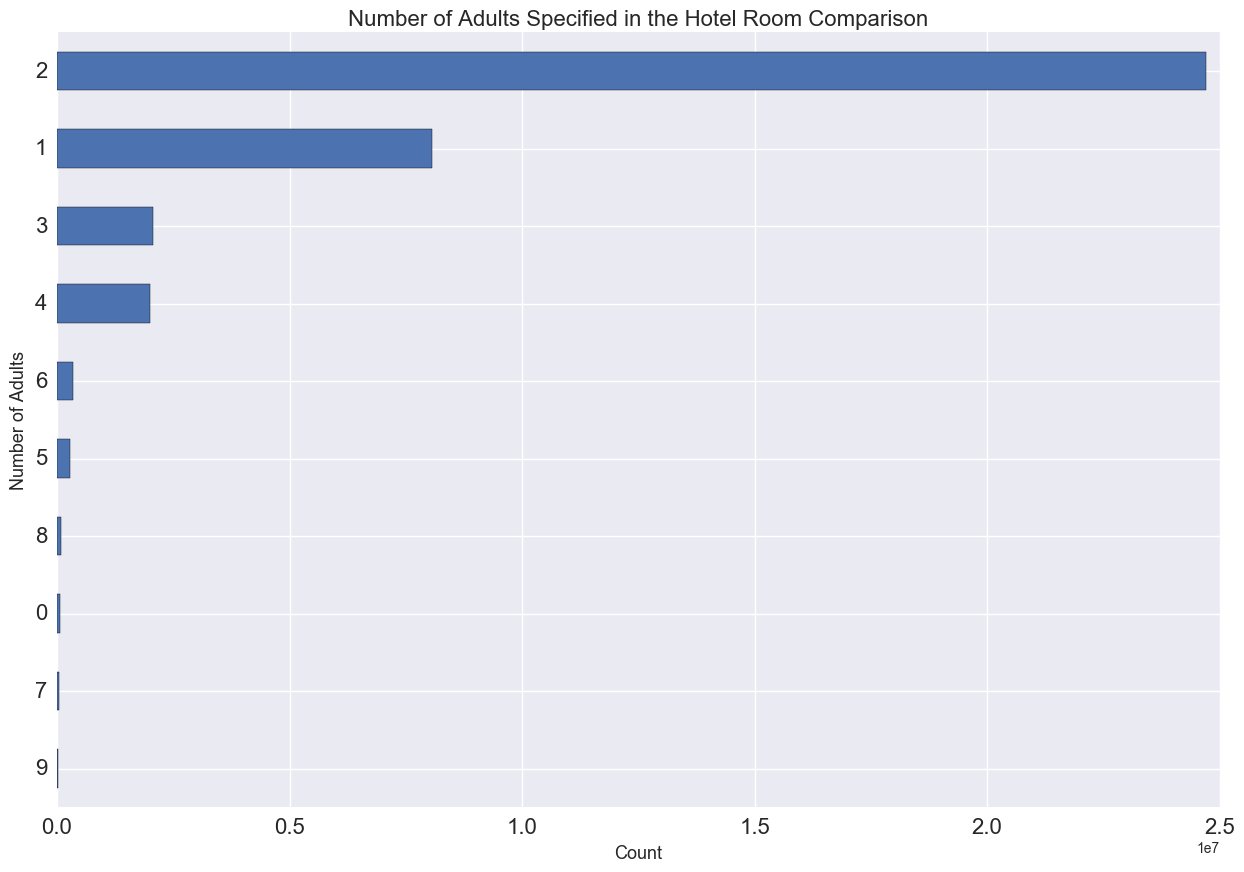

In [87]:
df.groupby('srch_adults_cnt').size().sort_values(ascending=True).plot(kind='barh',fontsize=16,figsize=(15,10),sort_columns= True)
plt.ylabel('Number of Adults',fontsize=13)
plt.xlabel('Count',fontsize=13)
plt.title('Number of Adults Specified in the Hotel Room Comparison',fontsize=16)
plt.show()

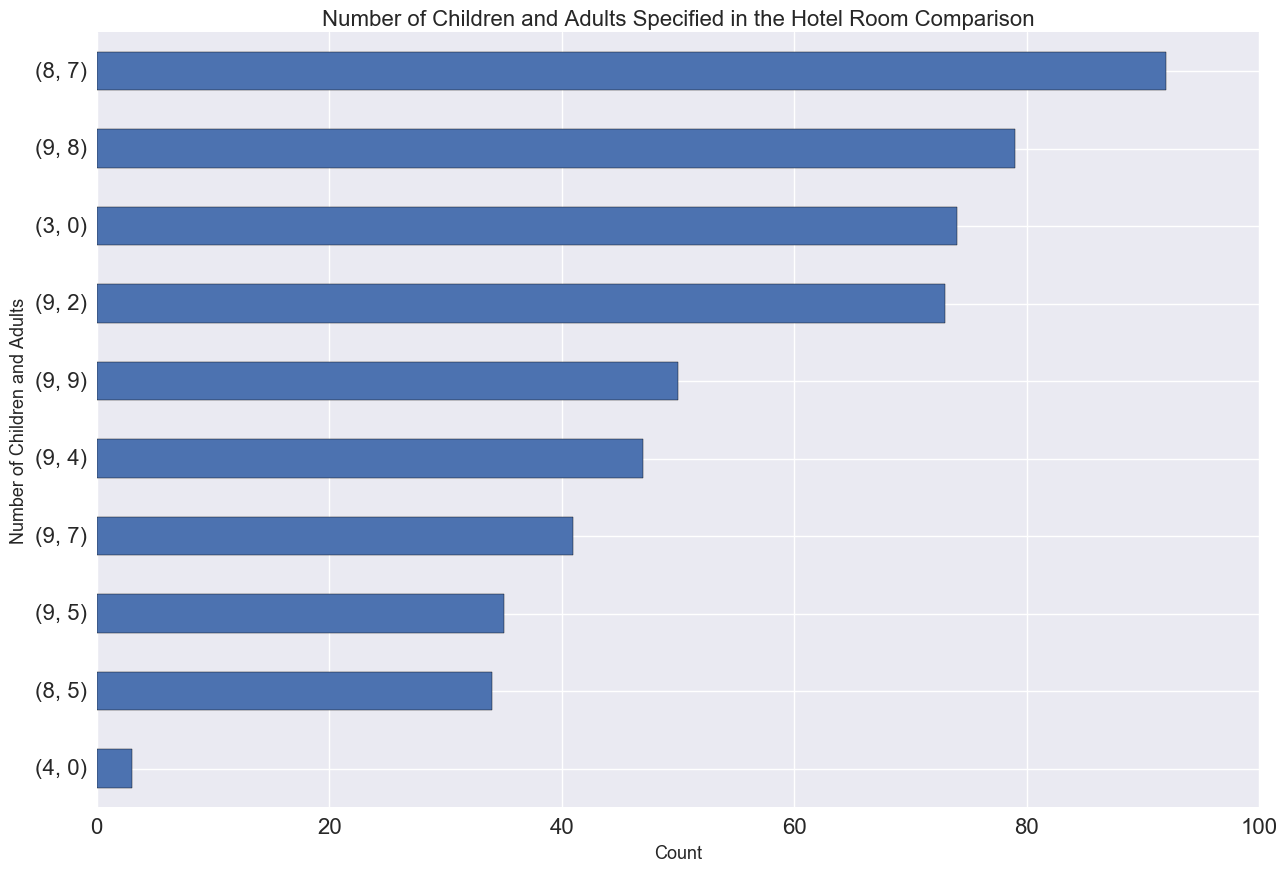

In [300]:


CombinedChiAdults = df.groupby(['srch_children_cnt','srch_adults_cnt']).size().sort_values(ascending=True)
CombinedChiAdults[:10].plot(kind='barh',fontsize=16,figsize=(15,10),sort_columns= True)
plt.ylabel('Number of Children and Adults',fontsize=13)
plt.xlabel('Count',fontsize=13)
plt.title('Number of Children and Adults Specified in the Hotel Room Comparison',fontsize=16)
plt.show()

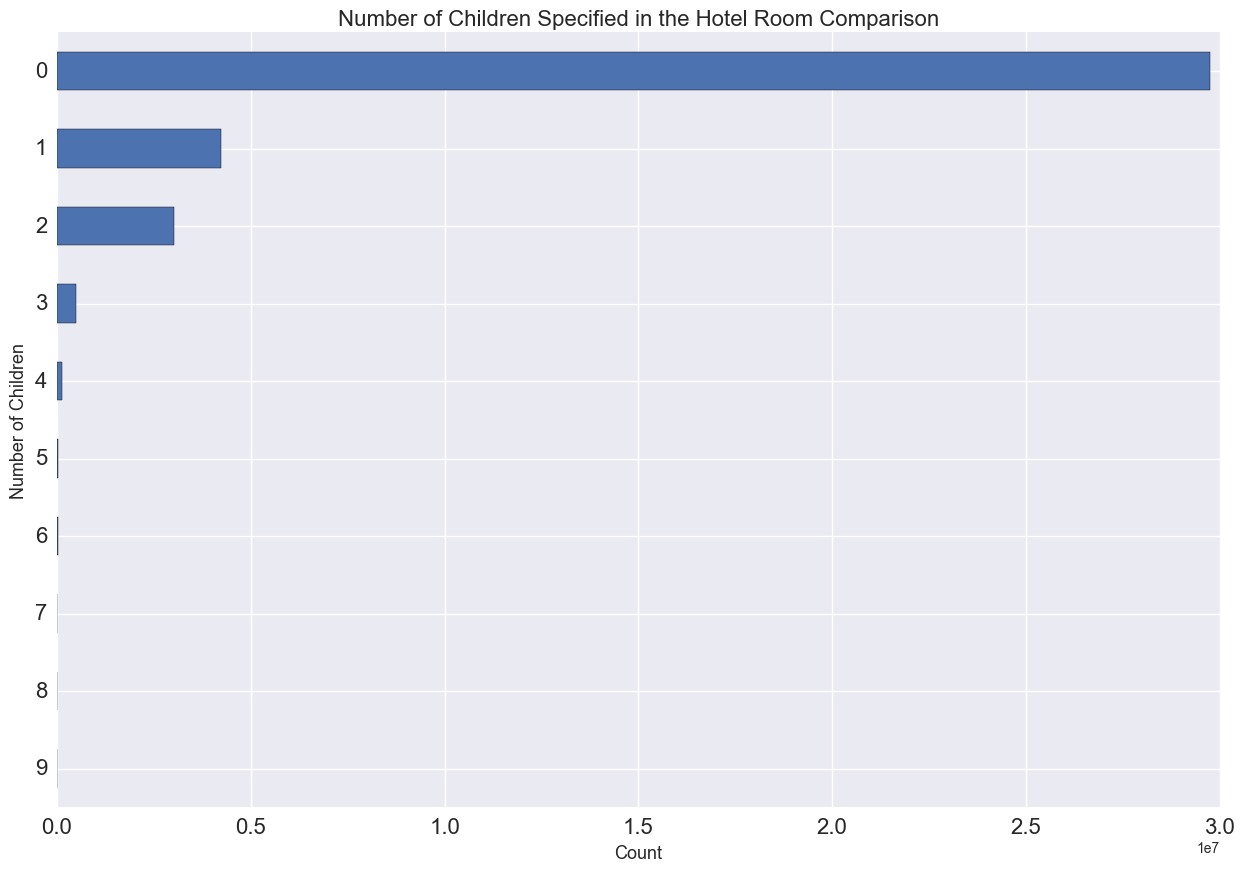

In [297]:
df.groupby('srch_children_cnt',).size().sort_values(ascending=True).plot(kind='barh',fontsize=16,figsize=(15,10),sort_columns= True)
plt.ylabel('Number of Children',fontsize=13)
plt.xlabel('Count',fontsize=13)
plt.title('Number of Children Specified in the Hotel Room Comparison',fontsize=16)
plt.show()

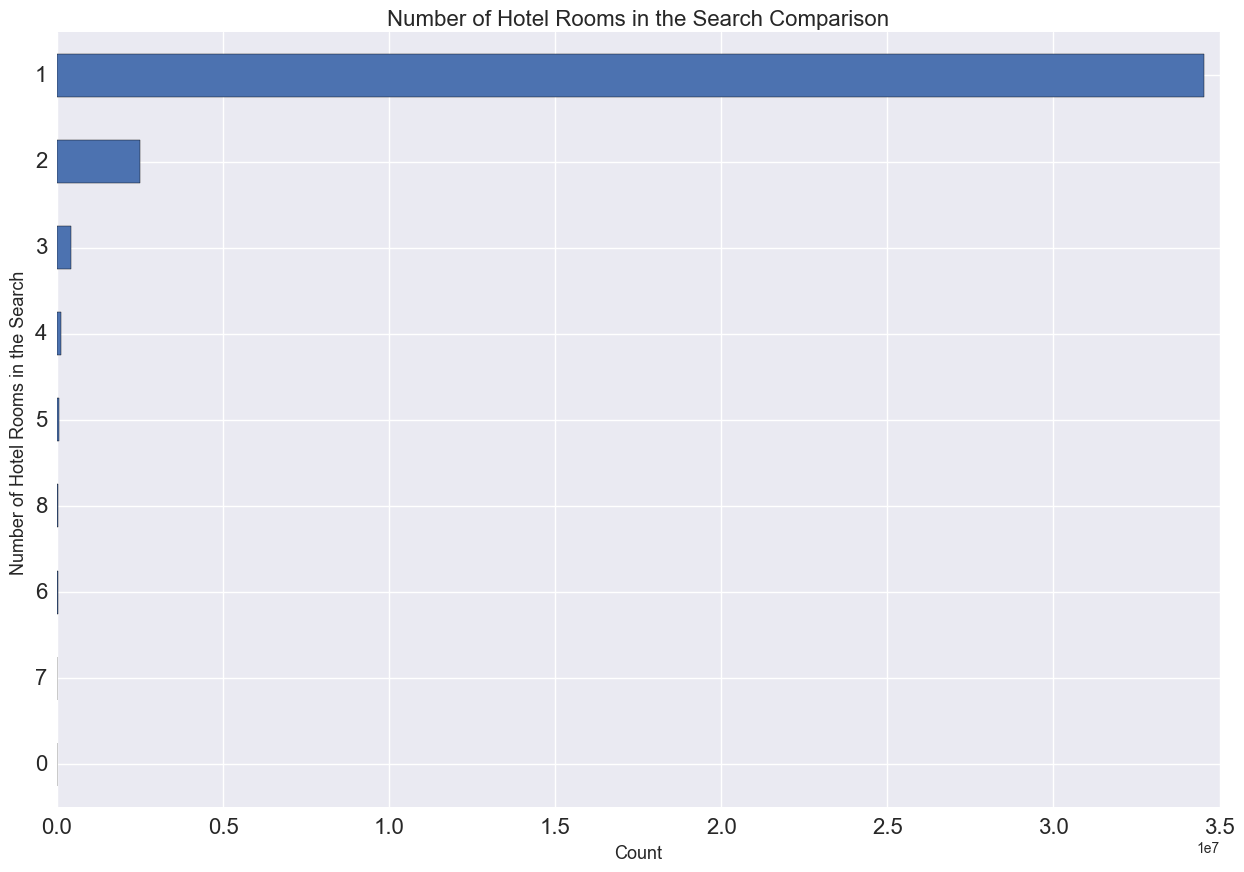

In [89]:
df.groupby('srch_rm_cnt').size().sort_values(ascending=True).plot(kind='barh',fontsize=16,figsize=(15,10),sort_columns= True)
plt.ylabel('Number of Hotel Rooms in the Search ',fontsize=13)
plt.xlabel('Count',fontsize=13)
plt.title('Number of Hotel Rooms in the Search Comparison',fontsize=16)
plt.show()

In [90]:
df['is_package']

0           1
1           1
2           0
3           0
4           0
5           0
6           0
7           1
8           0
9           0
10          0
11          0
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          0
25          1
26          1
27          1
28          0
29          0
           ..
37670263    1
37670264    1
37670265    1
37670266    1
37670267    0
37670268    0
37670269    0
37670270    0
37670271    0
37670272    0
37670273    0
37670274    0
37670275    0
37670276    0
37670277    0
37670278    1
37670279    1
37670280    1
37670281    1
37670282    1
37670283    0
37670284    0
37670285    0
37670286    0
37670287    0
37670288    1
37670289    0
37670290    0
37670291    0
37670292    0
Name: is_package, dtype: int64

In [91]:
GroupByAdults = df.groupby(['srch_adults_cnt','is_package']).size()

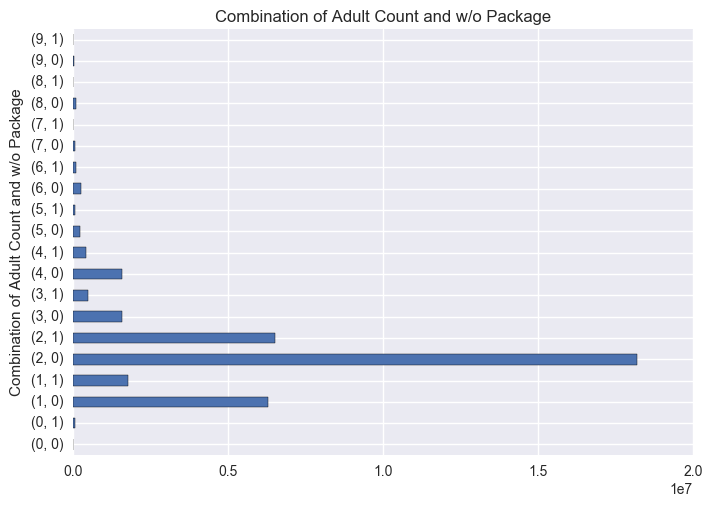

In [92]:
GroupByAdults.plot(kind='barh')
plt.ylabel('Combination of Adult Count and w/o Package')
plt.title('Combination of Adult Count and w/o Package')
plt.show()

#People search for the 

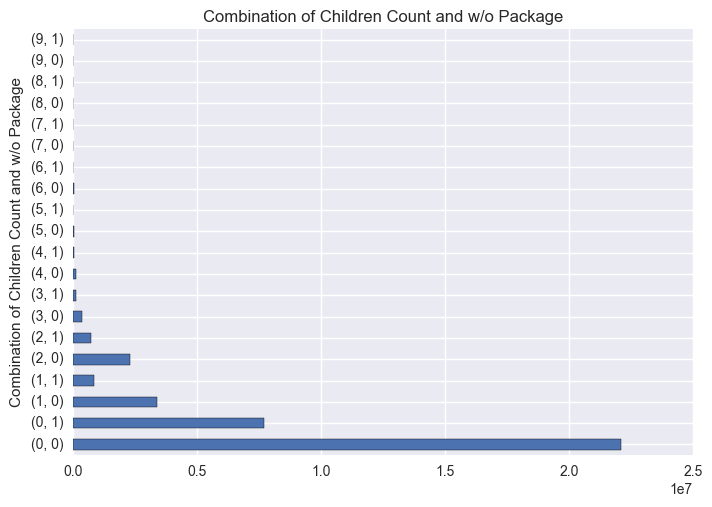

In [93]:
GroupByChildren = df.groupby(['srch_children_cnt','is_package']).size()
GroupByChildren.plot(kind='barh')
plt.ylabel('Combination of Children Count and w/o Package')
plt.title('Combination of Children Count and w/o Package')
plt.show()

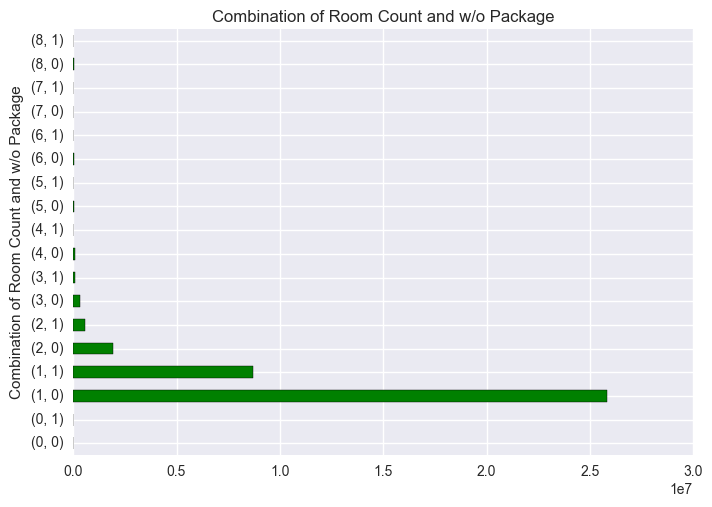

In [94]:
GroupByRoom = df.groupby(['srch_rm_cnt','is_package']).size()
GroupByRoom.plot(kind='barh',color = 'g')
plt.ylabel('Combination of Room Count and w/o Package')
plt.title('Combination of Room Count and w/o Package')
plt.show()

In [95]:
WithPackage = df[df['is_package']==1]

In [96]:
WithoutPackage = df[df['is_package']==0]

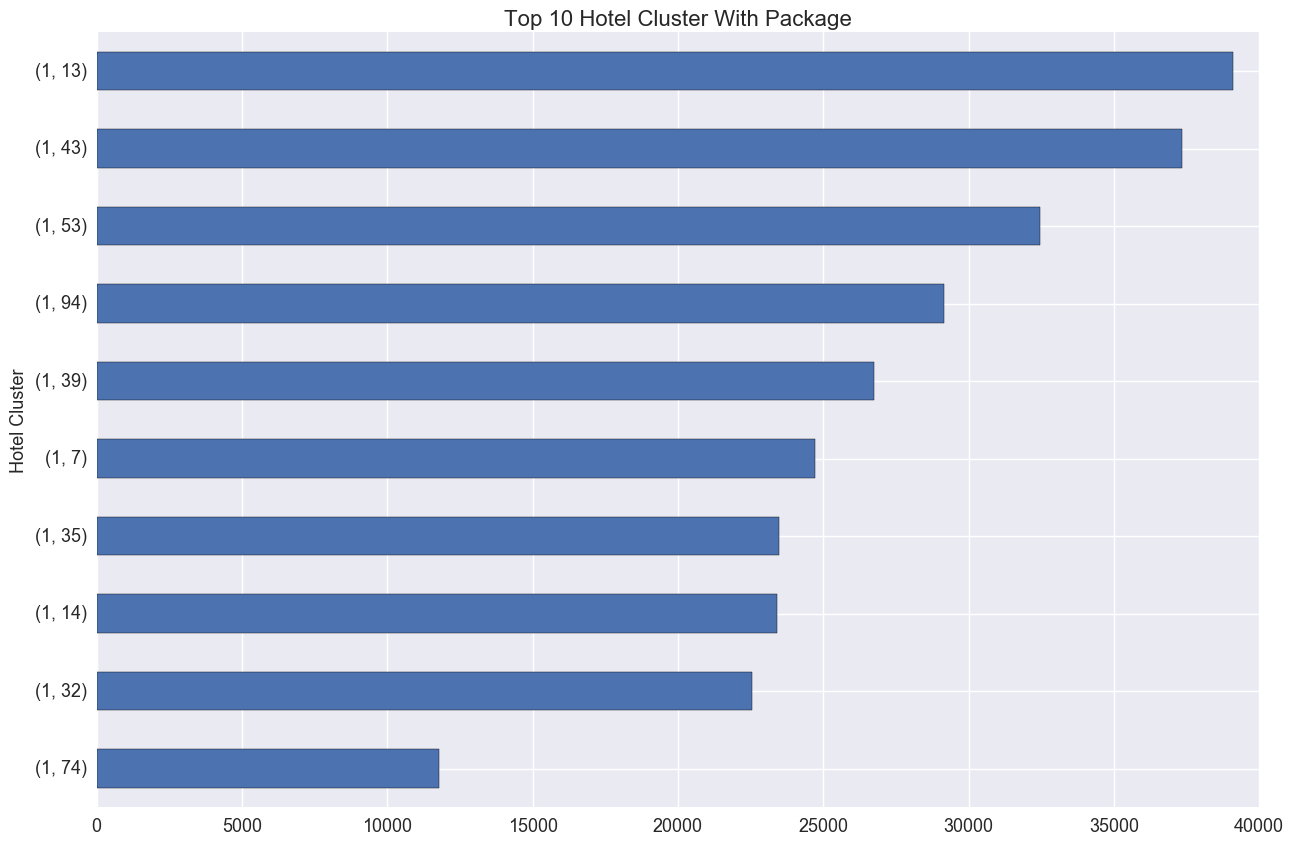

In [111]:
WithPackage1 = WithPackage.groupby(['is_package','hotel_cluster']).size().sort_values(ascending=True)
WithPackage1[:10].plot(kind='barh',fontsize=13,figsize=(15,10),sort_columns= True)
plt.ylabel('Hotel Cluster',fontsize=13)
plt.title('Top 10 Hotel Cluster With Package',fontsize=16)
plt.show()

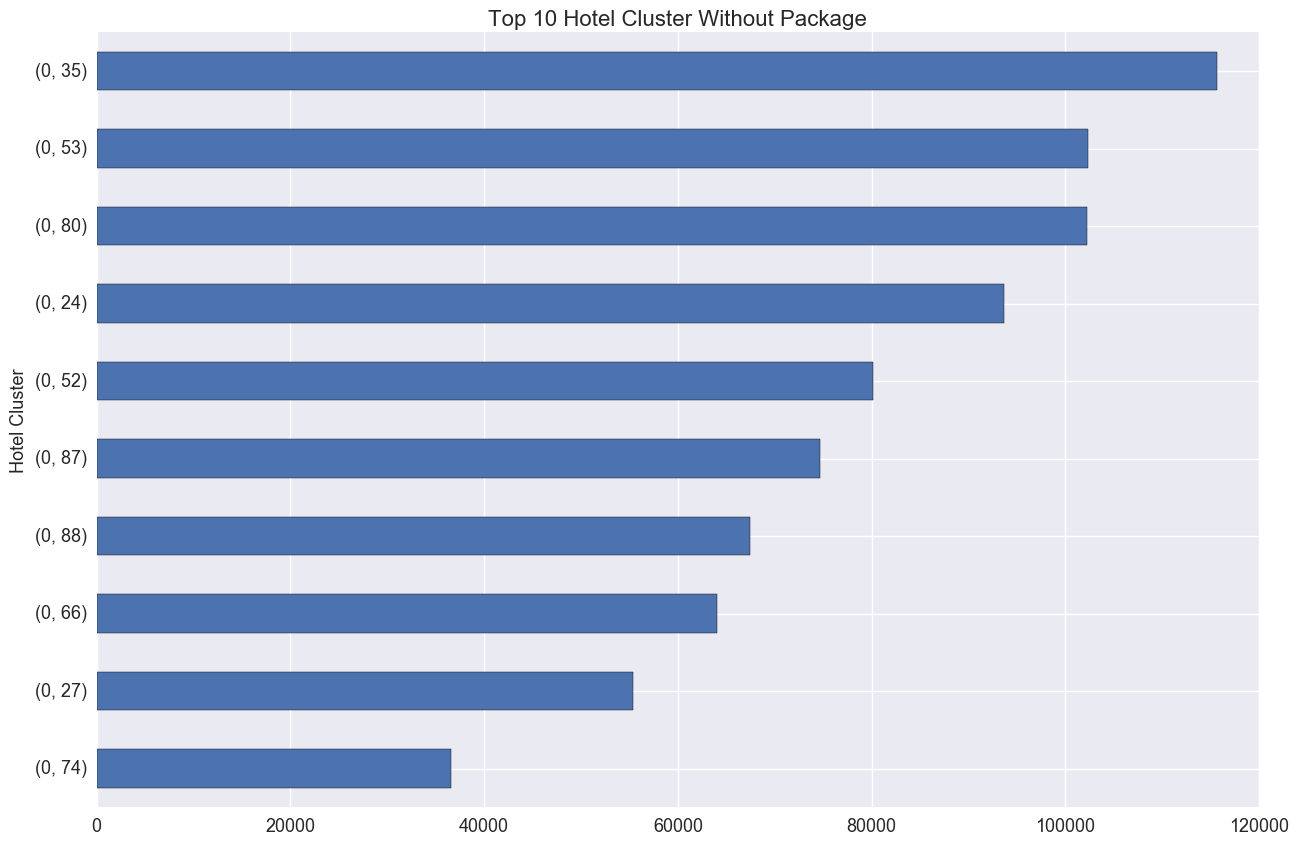

In [112]:
WithoutPackage1 = WithoutPackage.groupby(['is_package','hotel_cluster']).size().sort_values(ascending=True)
WithoutPackage1[:10].plot(kind='barh',fontsize=13,figsize=(15,10),sort_columns= True)
plt.ylabel('Hotel Cluster',fontsize=13)
plt.title('Top 10 Hotel Cluster Without Package',fontsize=16)
plt.show()

In [107]:
WithoutMobile = df[df['is_mobile']==0]

In [108]:
WithMobile = df[df['is_mobile']==1]

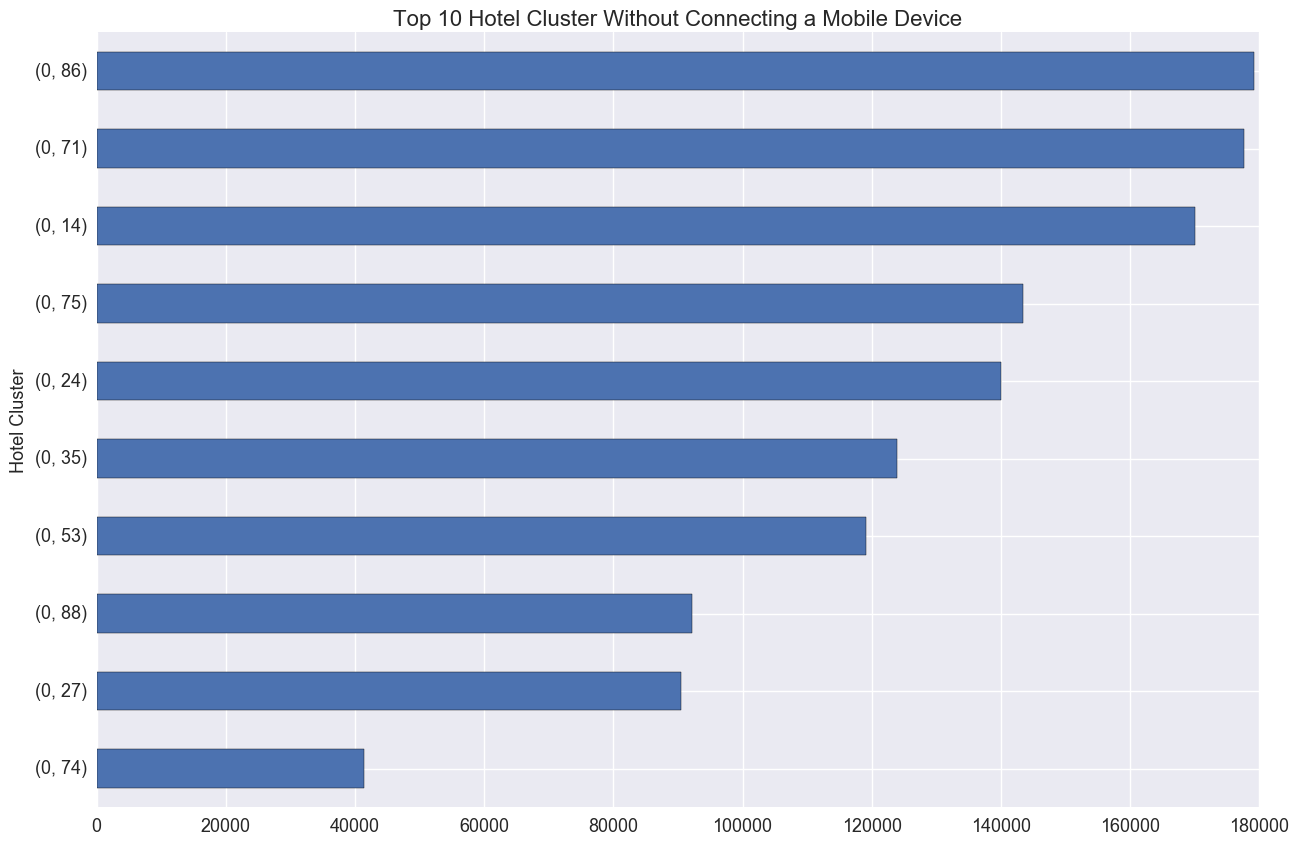

In [113]:
WithoutMobile1 = WithoutMobile.groupby(['is_mobile','hotel_cluster']).size().sort_values(ascending=True)
WithoutMobile1[:10].plot(kind='barh',fontsize=13,figsize=(15,10),sort_columns= True)
plt.ylabel('Hotel Cluster',fontsize=13)
plt.title('Top 10 Hotel Cluster Without Connecting a Mobile Device',fontsize=16)
plt.show()

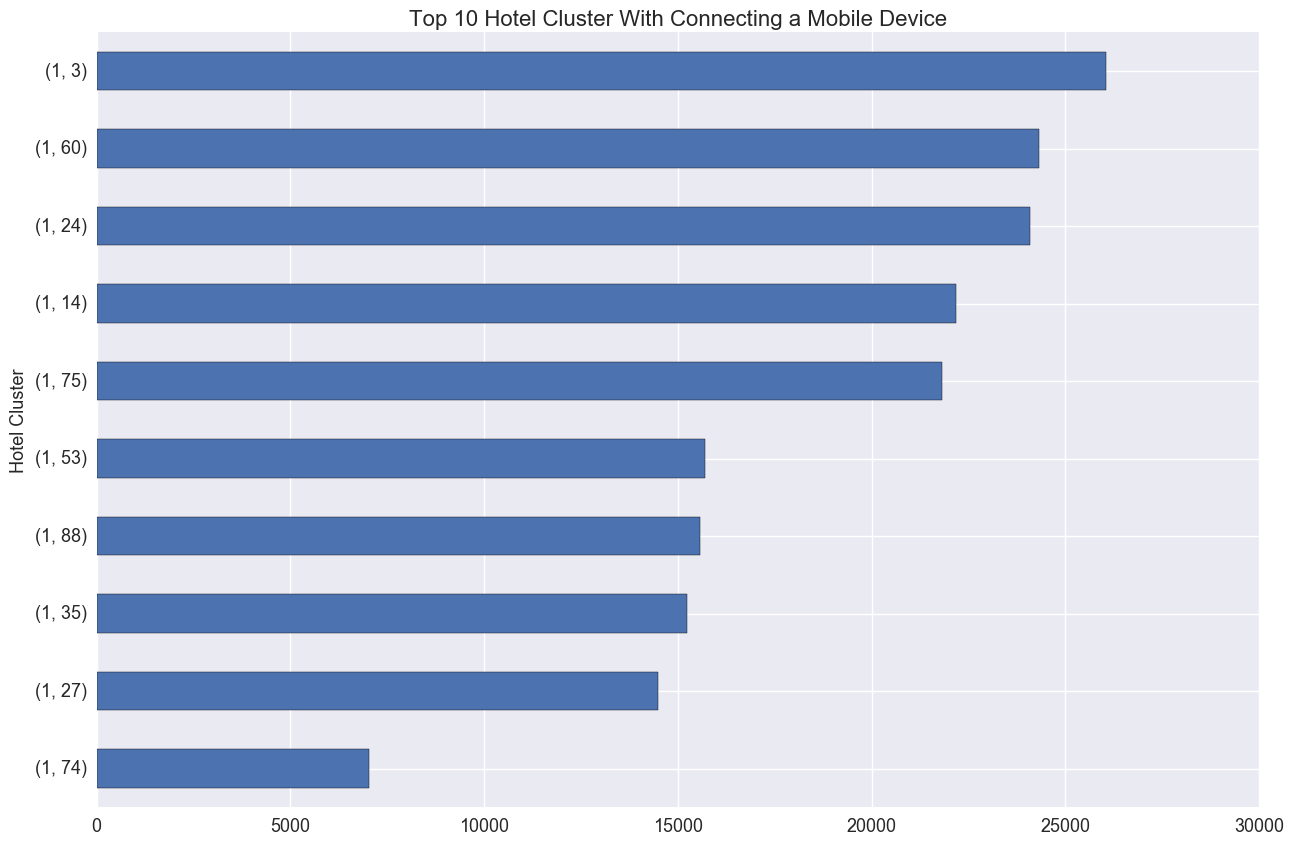

In [114]:
WithMobile1 = WithMobile.groupby(['is_mobile','hotel_cluster']).size().sort_values(ascending=True)
WithMobile1[:10].plot(kind='barh',fontsize=13,figsize=(15,10),sort_columns= True)
plt.ylabel('Hotel Cluster',fontsize=13)
plt.title('Top 10 Hotel Cluster With Connecting a Mobile Device',fontsize=16)
plt.show()

In [124]:
import pandas as pd
import numpy as np

DateTime = pd.read_csv('train-10.csv',
                   dtype={'srch_ci':np.object,
                         'srch_co':np.object,'hotel_cluster':np.int64},
                    usecols=['srch_ci','srch_co','hotel_cluster'],
                    chunksize=100000000)


for chunk in DateTime:
    DateTimedf = pd.concat([chunk])

In [195]:
DateTimedf.shape

(37670293, 3)

In [148]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(str(d1), "%Y-%m-%d")
    d2 = datetime.strptime(str(d2), "%Y-%m-%d")
    return abs((d2 - d1).days)

In [162]:
DateTimedf.isnull().sum()

srch_ci          47083
srch_co          47084
hotel_cluster        0
dtype: int64

In [163]:
DateTimedfWithoutNAN=DateTimedf.dropna(axis=0, how='any')

In [278]:
DateTimedfWithoutNAN.head()

,srch_ci,srch_co,hotel_cluster,Duration
0,2014-08-27,2014-08-31,1,4.0
1,2014-08-29,2014-09-02,1,4.0
2,2014-08-29,2014-09-02,1,4.0
3,2014-11-23,2014-11-28,80,5.0
4,2014-11-23,2014-11-28,21,5.0


In [277]:
DateTimedfWithoutNAN['Duration'] = DateTimedfWithoutNAN['Duration'].astype('timedelta64[D]')

/Users/tommyhuang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [279]:
DateTimedfWithoutNAN.head()

,srch_ci,srch_co,hotel_cluster,Duration
0,2014-08-27,2014-08-31,1,4.0
1,2014-08-29,2014-09-02,1,4.0
2,2014-08-29,2014-09-02,1,4.0
3,2014-11-23,2014-11-28,80,5.0
4,2014-11-23,2014-11-28,21,5.0


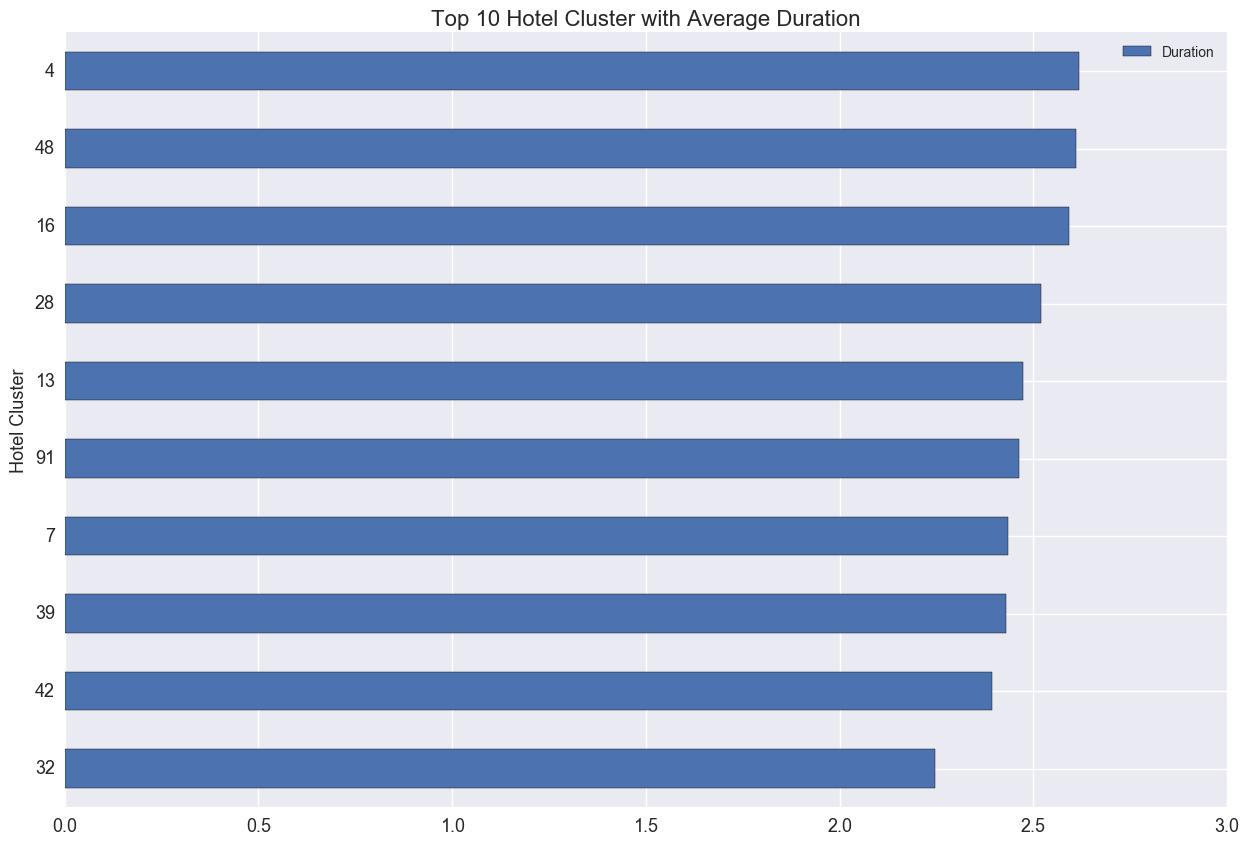

In [291]:
Duration_Mean = DateTimedfWithoutNAN.groupby(['hotel_cluster']).mean().sort_values('Duration',ascending=True)
Duration_Mean[:10].plot(kind='barh',fontsize=13,figsize=(15,10),sort_columns= True)
plt.ylabel('Hotel Cluster',fontsize=13)
plt.title('Top 10 Hotel Cluster with Average Duration',fontsize=16)
plt.show()

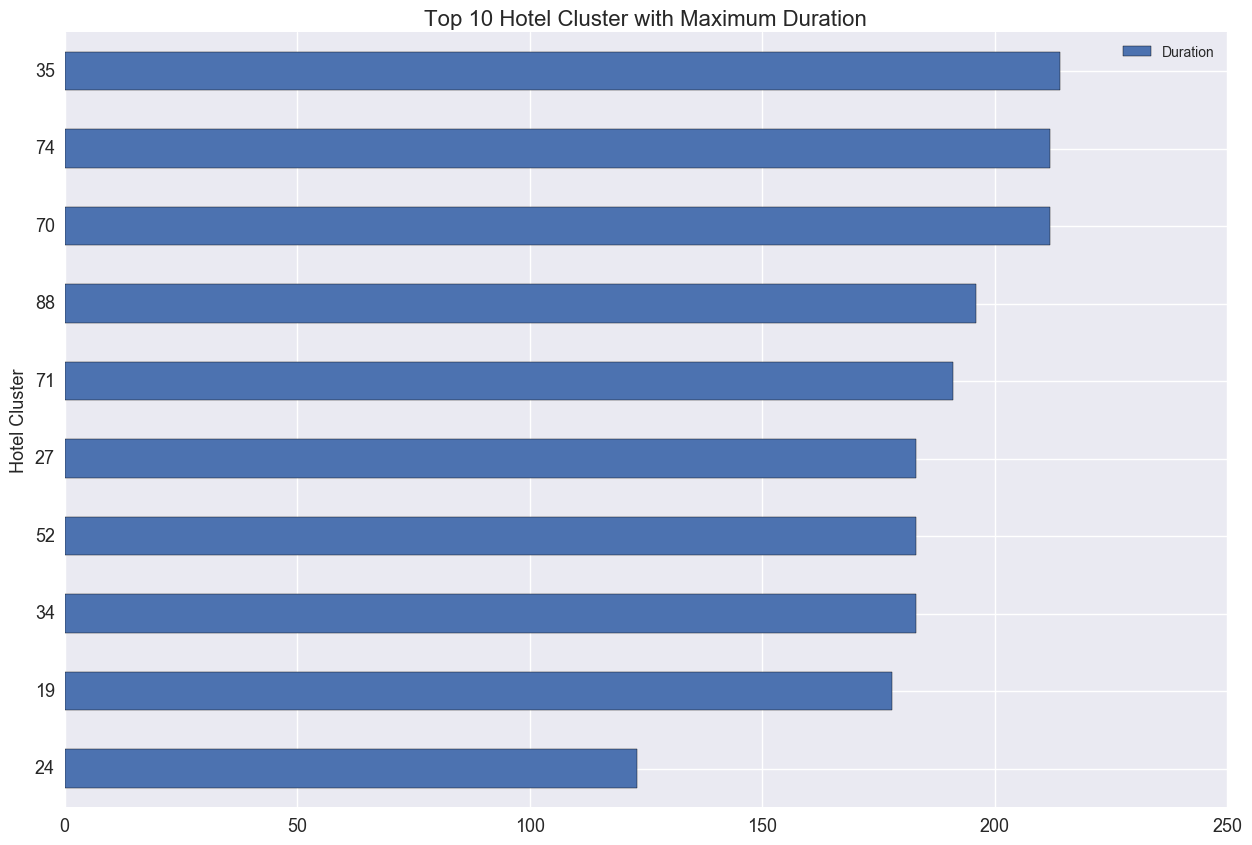

In [292]:
Duration_Max = DateTimedfWithoutNAN.groupby(['hotel_cluster']).max().sort_values('Duration',ascending=True)
Duration_Max[:10].plot(kind='barh',fontsize=13,figsize=(15,10),sort_columns= True)
plt.ylabel('Hotel Cluster',fontsize=13)
plt.title('Top 10 Hotel Cluster with Maximum Duration',fontsize=16)
plt.show()